In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt 
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns
import scipy
import datetime as dt

# Import the data set & View it 

In [18]:
Covid19 = pd.read_csv("/Users/Aims/Downloads/Covid19.Data - Sheet1.csv")

In [19]:
Covid19

,Unnamed: 0,Year,Country,Sex,Age.Group,COVID.19.Deaths,Pneumonia.Deaths,MonthR,Age.GroupR
0,11036,2020,United States,1,0-17 years,0,50,Jan,1.0
1,11040,2020,United States,1,18-29 years,0,75,Jan,2.0
2,11042,2020,United States,1,30-39 years,0,138,Jan,3.0
3,11044,2020,United States,1,40-49 years,0,261,Jan,4.0
4,11046,2020,United States,1,50-64 years,1,1430,Jan,5.0
...,...,...,...,...,...,...,...,...,...
411,12336,2022,United States,2,40-49 years,298,204,Feb,4.0
412,12338,2022,United States,2,50-64 years,1743,1195,Feb,5.0
413,12340,2022,United States,2,65-74 years,2582,1909,Feb,6.0
414,12341,2022,United States,2,75-84 years,3152,2220,Feb,7.0


In [20]:
Covid19.MonthR.value_counts()

Jan      48
Feb      48
April    32
Oct      32
March    32
Aug      32
July     32
Sep      32
Dec      32
May      32
June     32
Nov      32
Name: MonthR, dtype: int64

## Convert Month and Year to datetime object 

In [21]:
MonthDict = {'Jan': 'January', 'Feb': 'February', 'March': 'March', 'April': 'April', 'May': 'May', 'June': 'June', 'July': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
Covid19['MonthR'] = Covid19['MonthR'].map(MonthDict)
Covid19['Date'] = Covid19.MonthR+' 1, '+Covid19.Year.astype(str)
Covid19['Date'] = pd.to_datetime(Covid19['Date'])

In [22]:
Covid19.MonthR.value_counts()

January      48
February     48
April        32
December     32
March        32
July         32
May          32
June         32
September    32
October      32
August       32
November     32
Name: MonthR, dtype: int64

In [23]:
Covid19.head()

,Unnamed: 0,Year,Country,Sex,Age.Group,COVID.19.Deaths,Pneumonia.Deaths,MonthR,Age.GroupR,Date
0,11036,2020,United States,1,0-17 years,0,50,January,1.0,2020-01-01
1,11040,2020,United States,1,18-29 years,0,75,January,2.0,2020-01-01
2,11042,2020,United States,1,30-39 years,0,138,January,3.0,2020-01-01
3,11044,2020,United States,1,40-49 years,0,261,January,4.0,2020-01-01
4,11046,2020,United States,1,50-64 years,1,1430,January,5.0,2020-01-01


In [24]:
Covid19.dtypes

Unnamed: 0                   int64
Year                         int64
Country                     object
Sex                          int64
Age.Group                   object
COVID.19.Deaths              int64
Pneumonia.Deaths             int64
MonthR                      object
Age.GroupR                 float64
Date                datetime64[ns]
dtype: object

In [25]:
Covid19.set_index('Date', inplace=True)
Covid19.head()

,Unnamed: 0,Year,Country,Sex,Age.Group,COVID.19.Deaths,Pneumonia.Deaths,MonthR,Age.GroupR
Date,,,,,,,,,
2020-01-01,11036,2020,United States,1,0-17 years,0,50,January,1.0
2020-01-01,11040,2020,United States,1,18-29 years,0,75,January,2.0
2020-01-01,11042,2020,United States,1,30-39 years,0,138,January,3.0
2020-01-01,11044,2020,United States,1,40-49 years,0,261,January,4.0
2020-01-01,11046,2020,United States,1,50-64 years,1,1430,January,5.0


In [26]:
Covid19.to_csv('Covid19_WithDate.csv')

### Rename COVID.19Deaths 

In [27]:
Covid19.rename({"COVID.19.Deaths" : "CovidDeaths"}, axis=1, inplace=True)
Covid19

,Unnamed: 0,Year,Country,Sex,Age.Group,CovidDeaths,Pneumonia.Deaths,MonthR,Age.GroupR
Date,,,,,,,,,
2020-01-01,11036,2020,United States,1,0-17 years,0,50,January,1.0
2020-01-01,11040,2020,United States,1,18-29 years,0,75,January,2.0
2020-01-01,11042,2020,United States,1,30-39 years,0,138,January,3.0
2020-01-01,11044,2020,United States,1,40-49 years,0,261,January,4.0
2020-01-01,11046,2020,United States,1,50-64 years,1,1430,January,5.0
...,...,...,...,...,...,...,...,...,...
2022-02-01,12336,2022,United States,2,40-49 years,298,204,February,4.0
2022-02-01,12338,2022,United States,2,50-64 years,1743,1195,February,5.0
2022-02-01,12340,2022,United States,2,65-74 years,2582,1909,February,6.0


In [28]:
Covid19.rename({"Pneumonia.Deaths" : "PneumoniaDeaths"}, axis=1, inplace=True)
Covid19

,Unnamed: 0,Year,Country,Sex,Age.Group,CovidDeaths,PneumoniaDeaths,MonthR,Age.GroupR
Date,,,,,,,,,
2020-01-01,11036,2020,United States,1,0-17 years,0,50,January,1.0
2020-01-01,11040,2020,United States,1,18-29 years,0,75,January,2.0
2020-01-01,11042,2020,United States,1,30-39 years,0,138,January,3.0
2020-01-01,11044,2020,United States,1,40-49 years,0,261,January,4.0
2020-01-01,11046,2020,United States,1,50-64 years,1,1430,January,5.0
...,...,...,...,...,...,...,...,...,...
2022-02-01,12336,2022,United States,2,40-49 years,298,204,February,4.0
2022-02-01,12338,2022,United States,2,50-64 years,1743,1195,February,5.0
2022-02-01,12340,2022,United States,2,65-74 years,2582,1909,February,6.0


### Plot histogram for Covid deaths to see if data is normally distributed for each year

<AxesSubplot:>

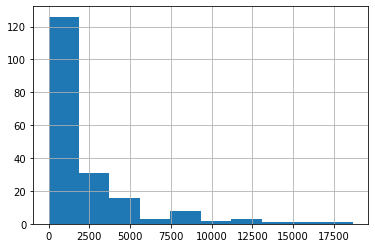

In [29]:
Covid19.CovidDeaths[Covid19.Year == 2020].hist()

<AxesSubplot:>

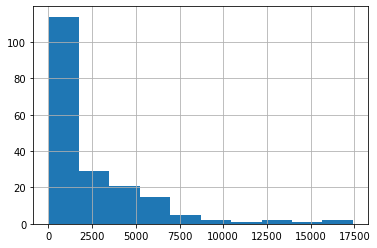

In [30]:
Covid19.CovidDeaths[Covid19.Year == 2021].hist()

<AxesSubplot:>

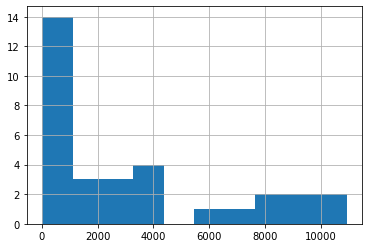

In [31]:
Covid19.CovidDeaths[Covid19.Year == 2022].hist()

##### COVID.19.Deaths are not evenly distributed for any year

## check to data to see if everything is an integer 

In [32]:
Covid19.dtypes

Unnamed: 0           int64
Year                 int64
Country             object
Sex                  int64
Age.Group           object
CovidDeaths          int64
PneumoniaDeaths      int64
MonthR              object
Age.GroupR         float64
dtype: object

## run dependent t test to see if there is a significant difference in COVID 19 deaths from 2020-2022

### Were there more deaths in the beginning of the Covid-19 pandemic then there are in the end of 2021 now that 66% of Americas population is now vaccinated?

#### Null: there is not a significant difference in COVID 19 deaths from 2020-2021 now that 66% of Amercas population is vaccinated.
#### Alternative: there is a significant difference in COVID 19 deaths from 2020-2021 now that 66% of Americas population is vaccinated.

In [33]:
stats.ttest_rel(Covid19.CovidDeaths[Covid19.Year == 2020],
         Covid19.CovidDeaths[Covid19.Year == 2021])

Ttest_relResult(statistic=-1.3289567699656946, pvalue=0.18544760794739706)

#### P-value @ 0.19 accept the null hypothese since p-value is greater than .05: this means that there is not a significant difference in the amount of covid deaths from year 2020 to year 2021.

### Could this mean treatment for Covid-19 in the US is not helping?

### Could this mean that COVID-19 vaccinations are not helping to prevent COVID-19?

## run dependent t test to see if there is a significant difference in Pneumonia deaths from 2020-2022
### Were there more deaths in the beginning of the Pneumonia pandemic then there are in the end of 2021?
#### Null: there is not a significant difference in Pneumonia deaths from 2020-2021 
#### Alternative: there is a significant difference in Pneumonia deaths from 2020-2021 

In [34]:
stats.ttest_rel(Covid19.PneumoniaDeaths[Covid19.Year == 2020],
         Covid19.PneumoniaDeaths[Covid19.Year == 2021])

Ttest_relResult(statistic=-2.0397656528373704, pvalue=0.04275068793465282)

### p-value is < 0.05 meaning that you reject the null hypothesis 
#### Thre is a signficant difference in the amount of pneumonia deaths from 2020-2021

##### change month and year to a datetime object to see how it looks on a graph 

## Run a pearsons correlation test to compare COVID-19 Deaths to Pneumonia Deaths
### Manova of covid deaths by age and manova of pnuemonia deahts by age: pnuemonia deaths pre covid vs pnuemonia deaths post deaths 
### How likely is it that you will develop pneumonia while having Covid-19?

#### Null: It is not likely that you will develop pneumonia while having Covid-19.
#### Alternative: It is likely that you will develop pneumonia while having Covid-19.

In [36]:
 Covid19['CovidDeaths'].corr(Covid19['Pneumonia.Deaths'])

KeyError: 'Pneumonia.Deaths'

#### covid deaths and pneumonia deaths are both correlated with age. as age goes up they both go up at similar rate 

#### The correlation is 0.95: When there are more Covid deaths there are more pnumonia deaths 

## Run a One-Way ANOVA test to compare the means of Covid deaths for each age group

### Is there a significant difference in Covid deaths among age groups?

#### Null: there is not a significant difference in covid deaths among age groups

#### alternative: there is a significant difference in covid deaths among age groups 

### Rename Age.Group

In [37]:
Covid19.rename({"Age.Group" : "AgeGroup"}, axis=1, inplace=True)
Covid19

,Unnamed: 0,Year,Country,Sex,AgeGroup,CovidDeaths,PneumoniaDeaths,MonthR,Age.GroupR
Date,,,,,,,,,
2020-01-01,11036,2020,United States,1,0-17 years,0,50,January,1.0
2020-01-01,11040,2020,United States,1,18-29 years,0,75,January,2.0
2020-01-01,11042,2020,United States,1,30-39 years,0,138,January,3.0
2020-01-01,11044,2020,United States,1,40-49 years,0,261,January,4.0
2020-01-01,11046,2020,United States,1,50-64 years,1,1430,January,5.0
...,...,...,...,...,...,...,...,...,...
2022-02-01,12336,2022,United States,2,40-49 years,298,204,February,4.0
2022-02-01,12338,2022,United States,2,50-64 years,1743,1195,February,5.0
2022-02-01,12340,2022,United States,2,65-74 years,2582,1909,February,6.0


### Look at the value counts for age group to determine all categories 

In [38]:
Covid19.AgeGroup.value_counts()

65-74 years          52
18-29 years          52
30-39 years          52
85 years and over    52
75-84 years          52
40-49 years          52
50-64 years          52
0-17 years           52
Name: AgeGroup, dtype: int64

### state the categories that will be used for ANOVA

In [39]:
categories = ['0-17 years', '18-29 years', '30-39 years', '40-49 years', '50-64 years', '65-74 years', '75-84 years', '85 years and over']
Covid1 = Covid19['AgeGroup'].isin(categories)
Covid2 = Covid19[Covid1].copy()

### Subset the varibales needed for ANOVA

In [40]:
Covid3 = Covid2[['AgeGroup', 'CovidDeaths']]
Covid3.head()

,AgeGroup,CovidDeaths
Date,,
2020-01-01,0-17 years,0
2020-01-01,18-29 years,0
2020-01-01,30-39 years,0
2020-01-01,40-49 years,0
2020-01-01,50-64 years,1


### make sure that CovidDeaths is an integer

In [41]:
Covid3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 2020-01-01 to 2022-02-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgeGroup     416 non-null    object
 1   CovidDeaths  416 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


#### CovidDeaths is an integer 

### Recode categories into a number 

In [42]:
Covid3.AgeGroup.value_counts()

65-74 years          52
18-29 years          52
30-39 years          52
85 years and over    52
75-84 years          52
40-49 years          52
50-64 years          52
0-17 years           52
Name: AgeGroup, dtype: int64

In [43]:
def recode(series):
    if series == "0-17 years":
        return 0 
    if series == "18-29 years":
        return 1 
    if series == "30-39 years":
        return 2
    if series == "40-49 years":
        return 3
    if series == "50-64 years":
        return 4
    if series == "65-74 years":
        return 5 
    if series == "75-84 years":
        return 6 
    if series == "85 years and over":
        return 7 
Covid3['AgeGroupR'] = Covid3['AgeGroup'].apply(recode)
Covid3.head()

<ipython-input-43-e1eabb06be65>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Covid3['AgeGroupR'] = Covid3['AgeGroup'].apply(recode)


,AgeGroup,CovidDeaths,AgeGroupR
Date,,,
2020-01-01,0-17 years,0,0
2020-01-01,18-29 years,0,1
2020-01-01,30-39 years,0,2
2020-01-01,40-49 years,0,3
2020-01-01,50-64 years,1,4


### Drop the AgeGroup 

In [44]:
Covid4 = Covid3[['AgeGroupR', 'CovidDeaths']]
Covid4.head()

,AgeGroupR,CovidDeaths
Date,,
2020-01-01,0,0
2020-01-01,1,0
2020-01-01,2,0
2020-01-01,3,0
2020-01-01,4,1


### Test for normality 

/Users/Aims/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CovidDeaths', ylabel='Density'>

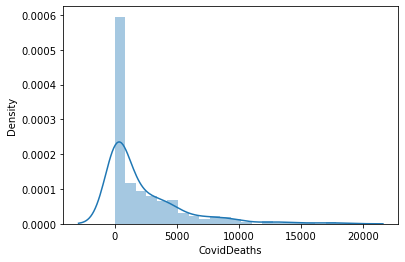

In [45]:
sns.distplot(Covid4['CovidDeaths'])

### Square root to get normality 

In [46]:
Covid4['CovidDeathsSQRT'] = np.sqrt(Covid4['CovidDeaths'])

/Users/Aims/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CovidDeathsSQRT', ylabel='Density'>

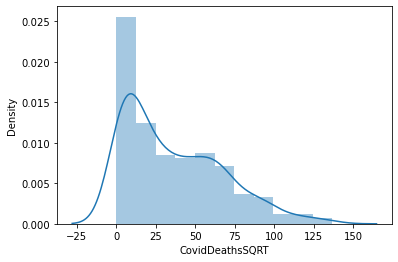

In [47]:
sns.distplot(Covid4['CovidDeathsSQRT'])

#### do not use the SQRT as normality is better on the original 

### Bartletts Test 

In [48]:
scipy.stats.bartlett(Covid4['CovidDeaths'], Covid4['AgeGroupR'])

BartlettResult(statistic=5436.427101324865, pvalue=0.0)

#### p value is <.05 which means you have violated the assumption of homogeneity of variance 


### Fligners Test to check p-value 

In [49]:
scipy.stats.fligner(Covid4['CovidDeaths'], Covid4['AgeGroupR'])

FlignerResult(statistic=513.1717202205858, pvalue=1.2946229830140042e-113)

#### p value is <.05 meaning you have violated the assumption of homogeneity of variance 


### Compute Post Hocs with Tukeys but be cautious 

In [50]:
postHoc = MultiComparison(Covid4['CovidDeaths'], Covid4['AgeGroupR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1      96.0    0.9 -1431.5623 1623.5623  False
     0      2  311.9231    0.9 -1215.6392 1839.4853  False
     0      3  769.8654  0.761  -757.6969 2297.4276  False
     0      4 3391.3077  0.001  1863.7454 4918.8699   True
     0      5 4148.0577  0.001  2620.4954 5675.6199   True
     0      6 4660.4231  0.001  3132.8608 6187.9853   True
     0      7 4655.6923  0.001  3128.1301 6183.2546   True
     1      2  215.9231    0.9 -1311.6392 1743.4853  False
     1      3  673.8654 0.8748  -853.6969 2201.4276  False
     1      4 3295.3077  0.001  1767.7454 4822.8699   True
     1      5 4052.0577  0.001  2524.4954 5579.6199   True
     1      6 4564.4231  0.001  3036.8608 6091.9853   True
     1      7 4559.6923  0.001  3032.1301 6087.2546   True
     2      3  457.9423    0.9 -1069.6199 1985.5046  Fal

#### there is a significant difference of covid deaths in people who are 50 and older vs people who are 50 and younger 

#### there is not a signigicant difference of covid deaths in age groups that are under 50 

#### there is not a significant difference of covid deaths in age groups that are over 50 

# Fine the SD for CovidDeaths

In [ ]:
print(Covid19['CovidDeaths'].std())

In [ ]:
print(Covid19['Pneumonia.Deaths'].std())

In [ ]:
norm_data = pd.DataFrame(np.random.normal(size=10000))

norm_data.plot(kind="density",
              figsize=(10,10));

plt.vlines(norm_data.mean(),
          ymin=0,
          ymax=0.4,
          linewidth=5.0);

plt.vlines(norm_data.std(),
          ymin=0,
          ymax=0.4,
          linewidth=2.0,
          color="red");

### STD is in the 1st sigma meaning that the mean is correct 

In [ ]:
Covid19.min()

In [51]:
Covid19.max()

Unnamed: 0                     12342
Year                            2022
Country                United States
Sex                                2
AgeGroup           85 years and over
CovidDeaths                    18666
PneumoniaDeaths                11975
MonthR                     September
Age.GroupR                       8.0
dtype: object